In [1]:
import os
import sys
sys.path.append("..")

import torch
from utils.specs import CheckpointSpecs
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import utils.config_manager as cm
from sklearn.cluster import KMeans
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def find_all_pth_files(dir):
    '''
    Find names of all files in directory that end with .pth
    '''
    files = []
    for file in os.listdir(dir):
        if file.endswith(".pth"):
            files.append(os.path.join(dir, file))
    return files


def sort_file_paths(files):
    '''
    Sort files names in ascending order
    '''
    return sorted(files, key=lambda x: int(x.split('_')[-1].split('.')[0]))


file_names = find_all_pth_files('..\\checkpoints\\HF\\')
file_names = sort_file_paths(file_names)
print(file_names)

['..\\checkpoints\\HF\\checkpoint_epoch_0_batch_186.pth', '..\\checkpoints\\HF\\checkpoint_epoch_0_batch_373.pth', '..\\checkpoints\\HF\\checkpoint_epoch_0_batch_560.pth', '..\\checkpoints\\HF\\checkpoint_epoch_0_batch_747.pth', '..\\checkpoints\\HF\\checkpoint_epoch_0_batch_934.pth', '..\\checkpoints\\HF\\checkpoint_epoch_0_batch_1121.pth', '..\\checkpoints\\HF\\checkpoint_epoch_0_batch_1308.pth', '..\\checkpoints\\HF\\checkpoint_epoch_0_batch_1495.pth', '..\\checkpoints\\HF\\checkpoint_epoch_0_batch_1682.pth', '..\\checkpoints\\HF\\checkpoint_epoch_0_batch_1869.pth']


In [3]:
checkpoint_specs = CheckpointSpecs(file_names[0])

d:\Documents\Programming\Bsc Thesis\Second-order-optimization\.venv\Lib\site-packages\torch\autograd\__init__.py:200: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at ..\torch\csrc\autograd\engine.cpp:1156.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


In [4]:
checkpoint_specs.compute_grads()
model = checkpoint_specs._model

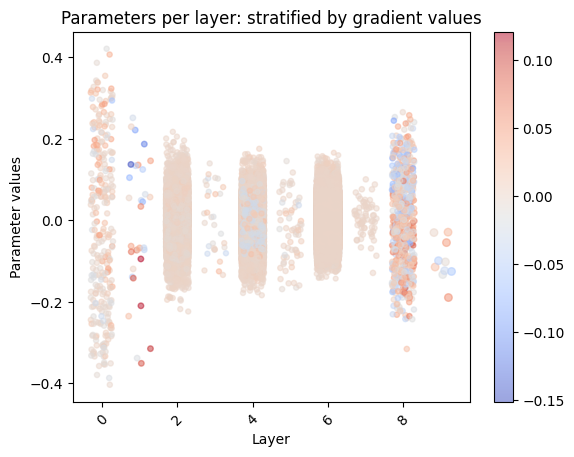

In [19]:
def add_id_to_lists(A, B, x, s, n):
    C = []
    for i in range(len(A)):
        C.append([A[i], B[i], x, s, n])
    return C

parameter_position_pairs = []
for param_idx, (name, param) in enumerate(model.named_parameters()):
    params = list(param.data.cpu().numpy().flatten())
    gradients = list(param.grad.data.cpu().numpy().flatten())
    scaler = (np.var(params) - np.min(params)) / (np.max(params) - np.min(params))
    id_patams = add_id_to_lists(params, gradients, param_idx, scaler, name)
    parameter_position_pairs.extend(id_patams)

xs = [x[2] for x in parameter_position_pairs]
ys = [x[0] for x in parameter_position_pairs]
zs = [x[1] for x in parameter_position_pairs]
vs = [x[3] for x in parameter_position_pairs]
ns = [x[4] for x in parameter_position_pairs]

min_marker_size = 1
max_marker_size = 25
marker_size = [min_marker_size + (max_marker_size - min_marker_size) * v for v in vs]

jitter_amount = 0.3
x_jitter = np.random.uniform(-jitter_amount, jitter_amount, len(xs))
# ploy y as exponential scale
plt.scatter(x=xs+x_jitter, y=ys, s=marker_size, alpha=0.5, c=zs, cmap='plasma')
plt.ylabel('Parameter values')
plt.xlabel('Layer')
plt.title(f'Parameters per layer: stratified by gradient values')
# turn x labels sideways
plt.xticks(rotation=45)
# add colorbar
plt.colorbar()
plt.show()

d:\Documents\Programming\Bsc Thesis\Second-order-optimization\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


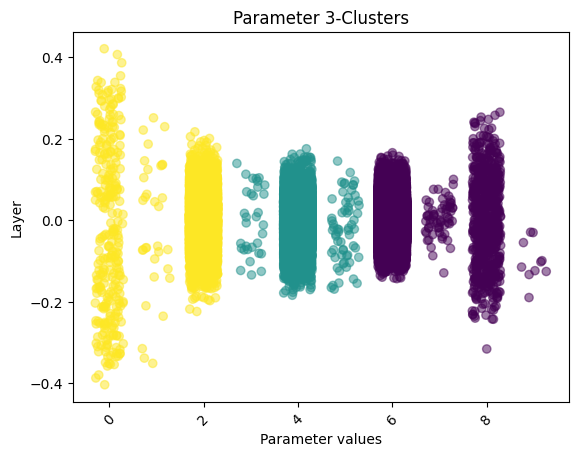

In [47]:
def cluster_params_plot(model, k=3):
    parameter_position_pairs = []
    for param_idx, (name, param) in enumerate(model.named_parameters()):
        gradient = list(param.data.cpu().numpy().flatten())
        # parameter_position_pairs.extend(add_id_to_list(gradient, name))
        parameter_position_pairs.extend(add_id_to_list(gradient, param_idx))
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(parameter_position_pairs)
    
    xs = [x[1] for x in parameter_position_pairs]
    ys = [x[0] for x in parameter_position_pairs]

    # Visualize clusters
    jitter_amount = 0.3
    x_jitter = np.random.uniform(-jitter_amount, jitter_amount, len(xs))
    plt.scatter(x=xs+x_jitter, y=ys, alpha=0.5, c=clusters)
    plt.xlabel('Parameter values')
    plt.ylabel('Layer')
    plt.title(f'Parameter {k}-Clusters')
    # turn x labels sideways
    plt.xticks(rotation=45)
    plt.show()

model = checkpoint_specs.copy_model()
# create a loop with i from 2 to 10
cluster_params_plot(model, 3)

In [20]:
# create a scatter plot of parameter_position_pairs
def scatter_plot(x):
    for pair in x:
        plt.scatter(pair[0], pair[1])
    plt.xlabel('Parameter')
    plt.ylabel('Gradient')
    plt.title('Parameter-Gradient Scatter Plot')
    plt.show()

In [21]:
scatter_plot(parameter_position_pairs)

KeyboardInterrupt: 

In [7]:
%matplotlib inline
for f in file_names:
    checkpoint_specs = CheckpointSpecs(f)
    checkpoint_specs.top_eig_perb_plot()
    checkpoint_specs.top_2_eig_perb_plot()
    checkpoint_specs.grad_perb_plot()
    checkpoint_specs.hessian_esd_plot(save=True)


d:\Documents\Programming\Bsc Thesis\Second-order-optimization\test\..\utils\specs.py:134: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
d:\Documents\Programming\Bsc Thesis\Second-order-optimization\test\..\utils\specs.py:140: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
d:\Documents\Programming\Bsc Thesis\Second-order-optimization\test\..\utils\specs.py:172: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


<Figure size 640x480 with 0 Axes>

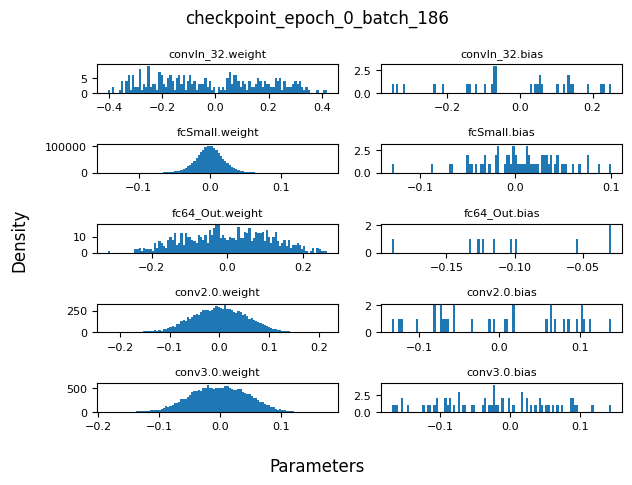

d:\Documents\Programming\Bsc Thesis\Second-order-optimization\test\..\utils\specs.py:189: RuntimeWarning: divide by zero encountered in log
  log_density = np.log(log_density)


<Figure size 640x480 with 0 Axes>

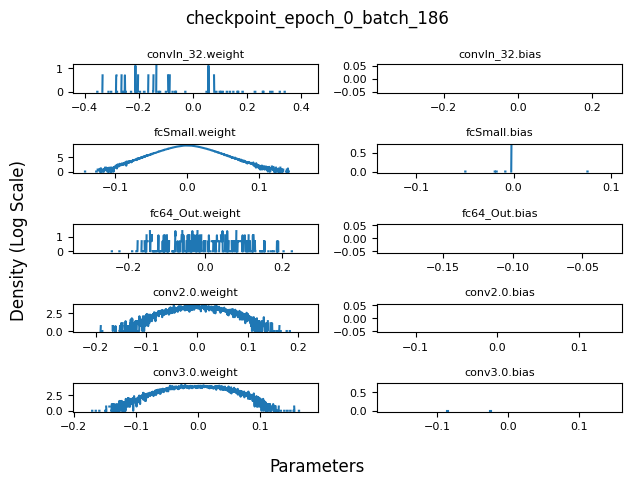

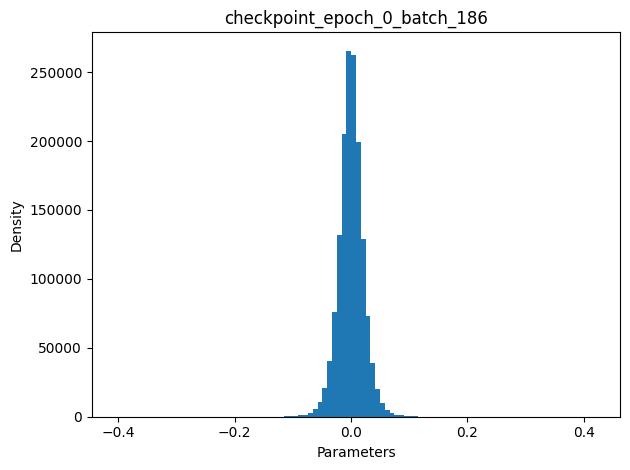

d:\Documents\Programming\Bsc Thesis\Second-order-optimization\test\..\utils\specs.py:216: RuntimeWarning: divide by zero encountered in log
  log_density = np.log(log_density)


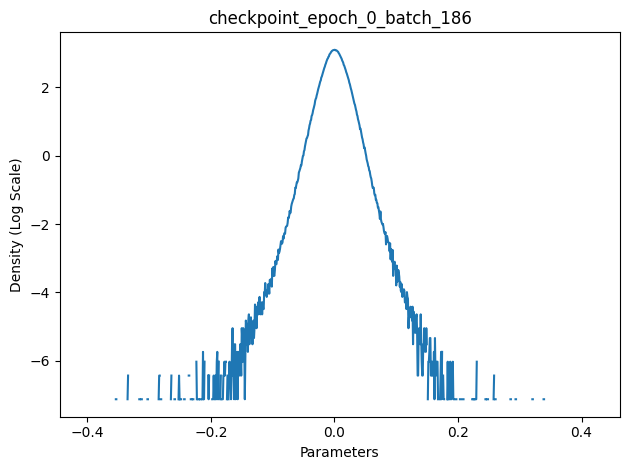

<Figure size 640x480 with 0 Axes>

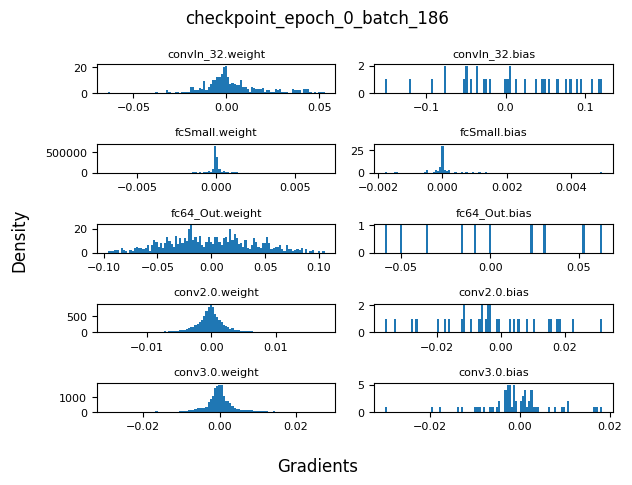

<Figure size 640x480 with 0 Axes>

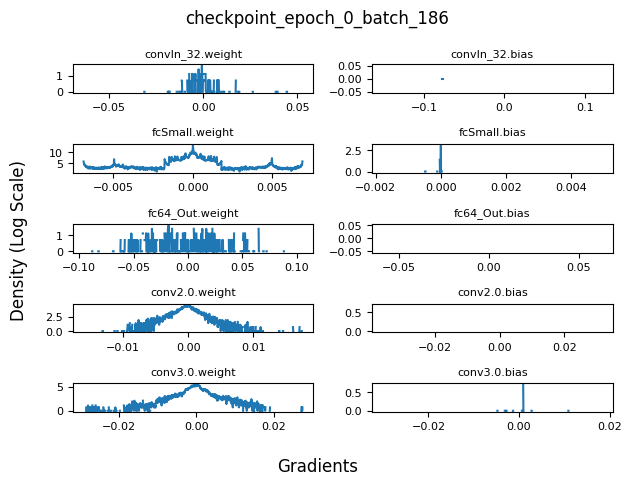

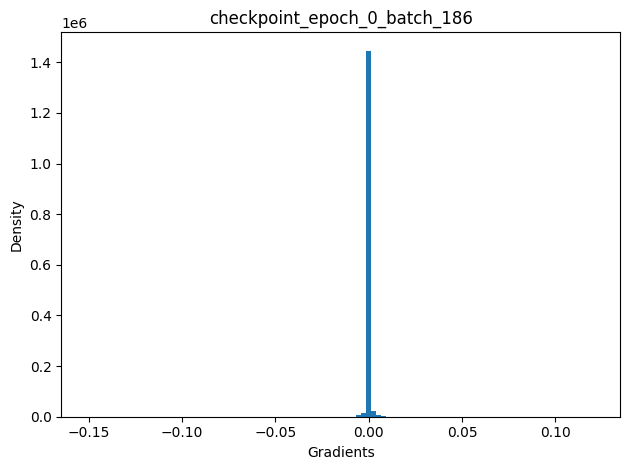

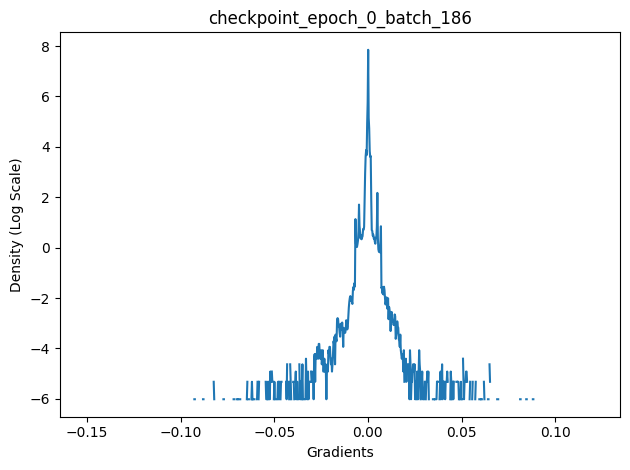

<Figure size 640x480 with 0 Axes>

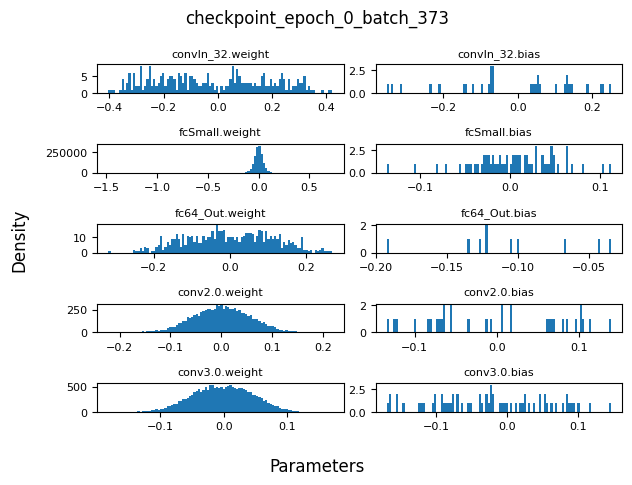

<Figure size 640x480 with 0 Axes>

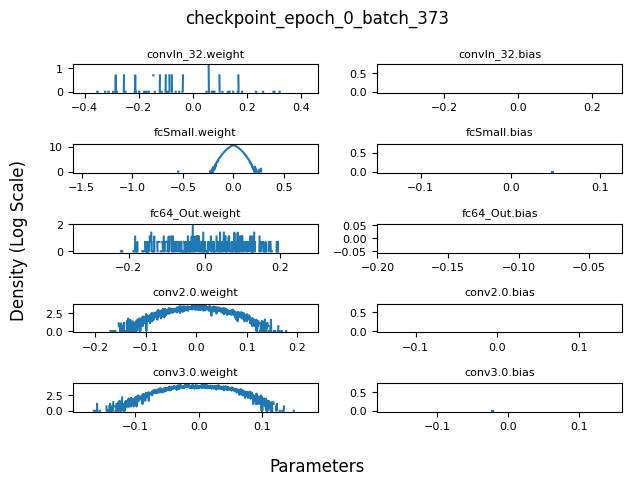

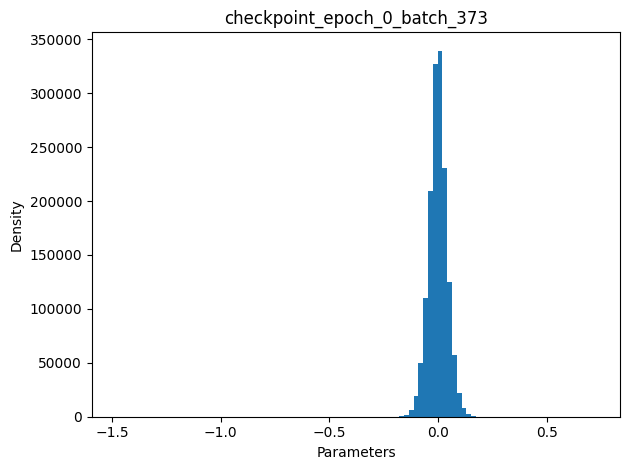

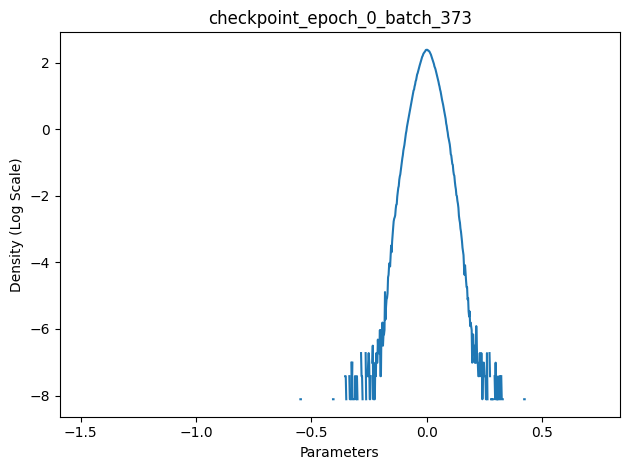

<Figure size 640x480 with 0 Axes>

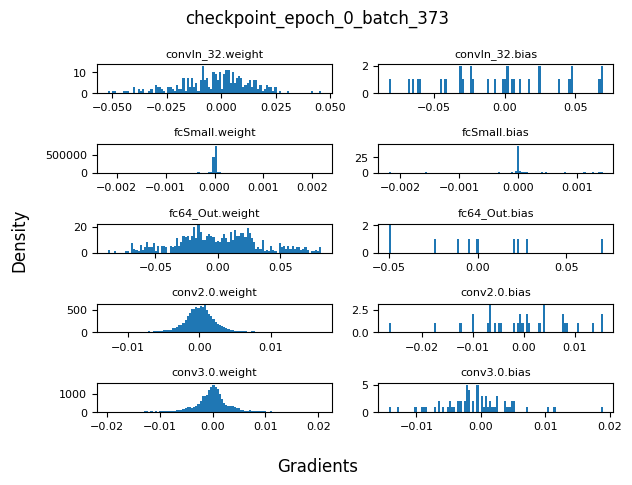

<Figure size 640x480 with 0 Axes>

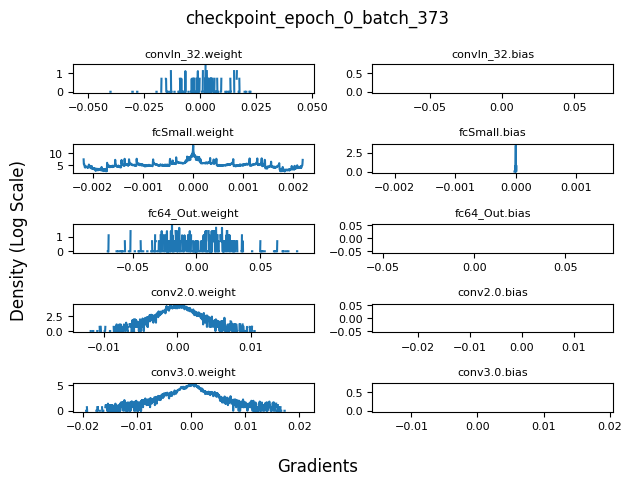

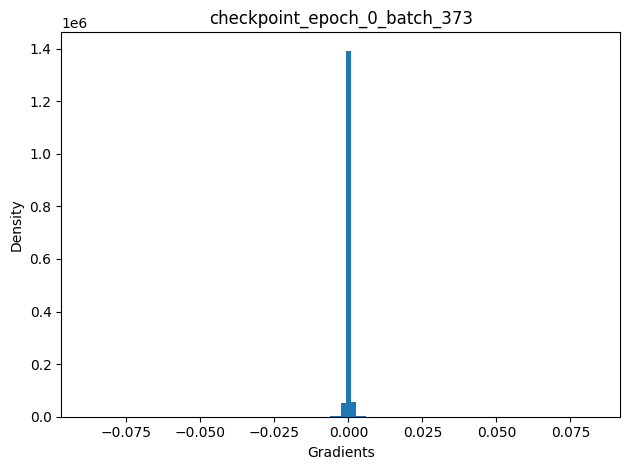

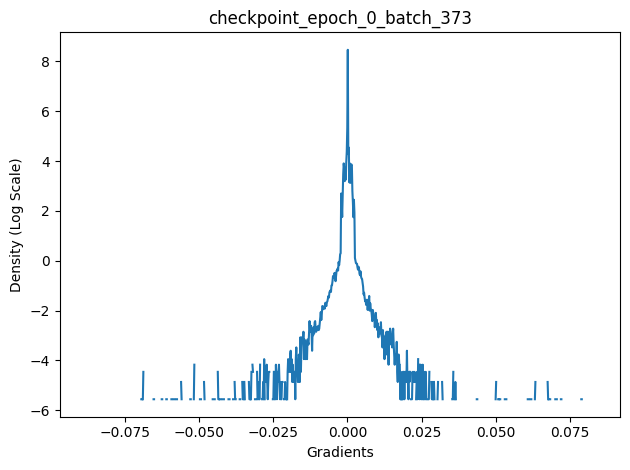

<Figure size 640x480 with 0 Axes>

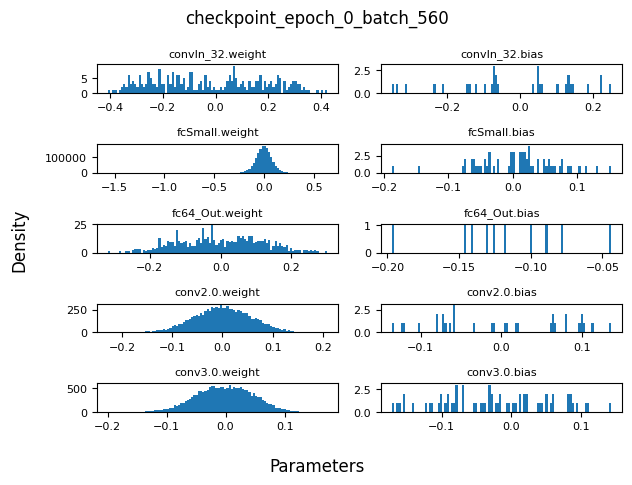

<Figure size 640x480 with 0 Axes>

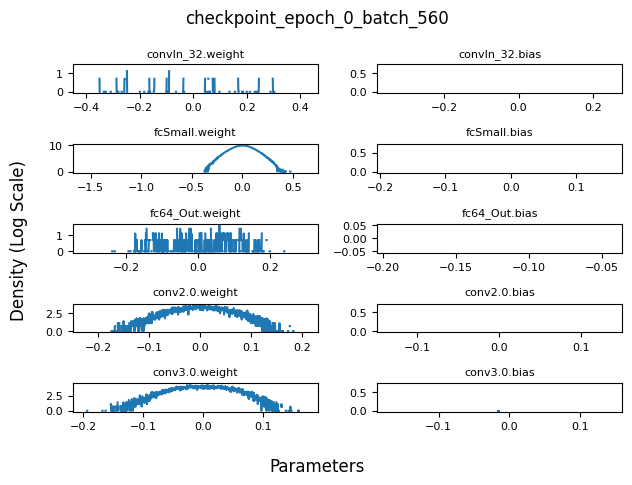

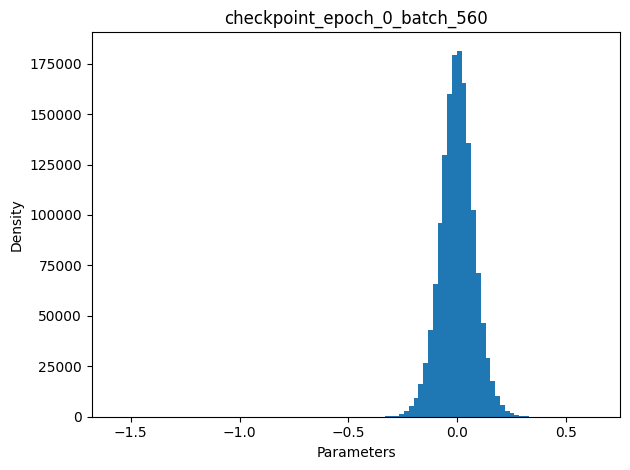

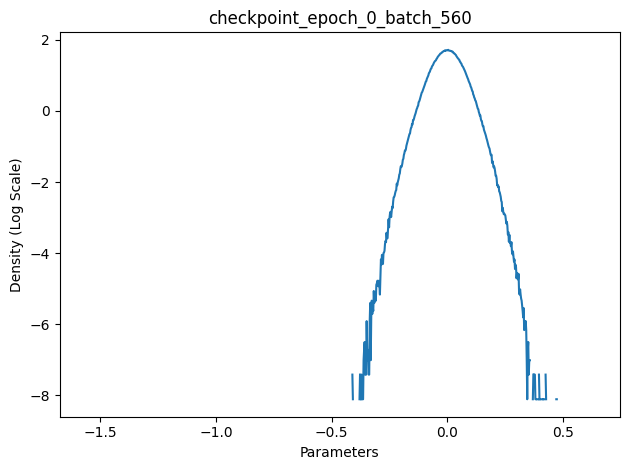

<Figure size 640x480 with 0 Axes>

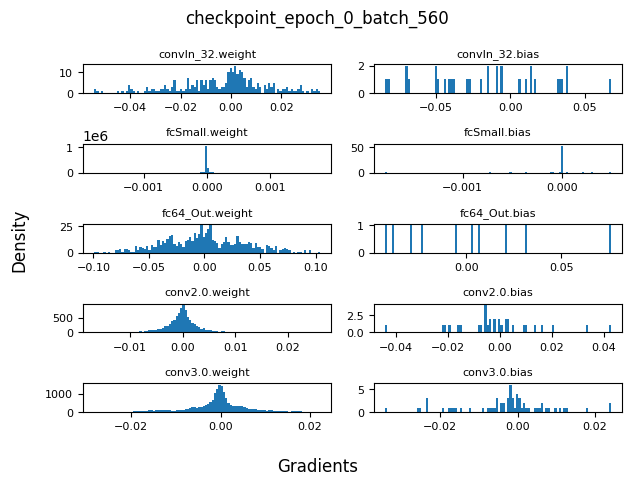

<Figure size 640x480 with 0 Axes>

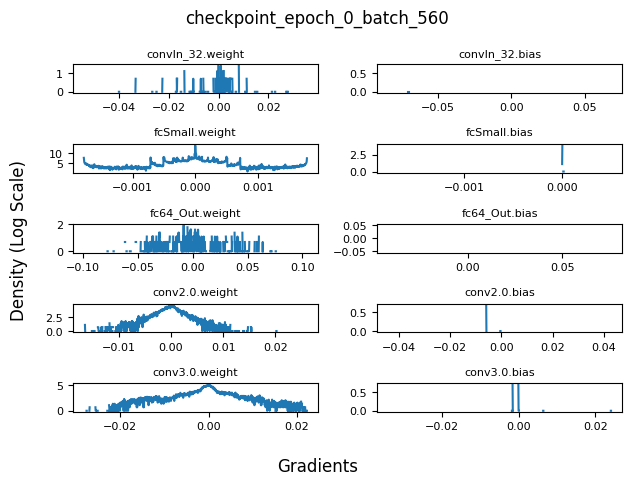

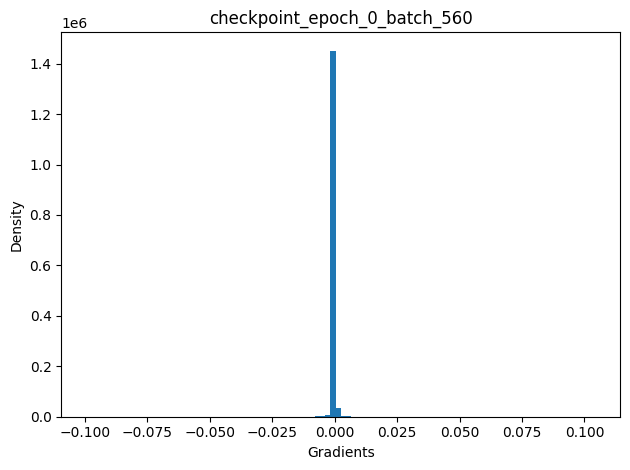

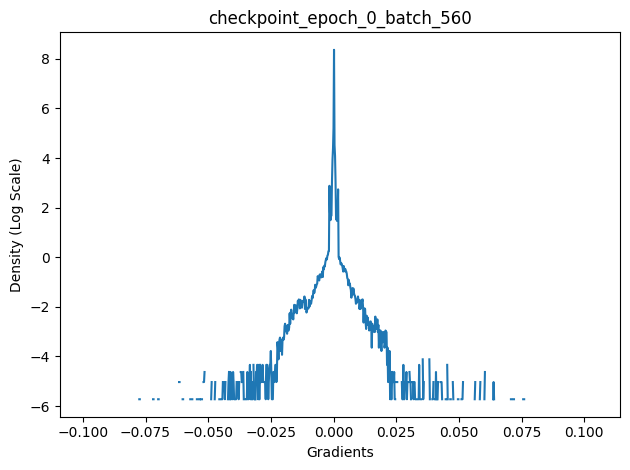

<Figure size 640x480 with 0 Axes>

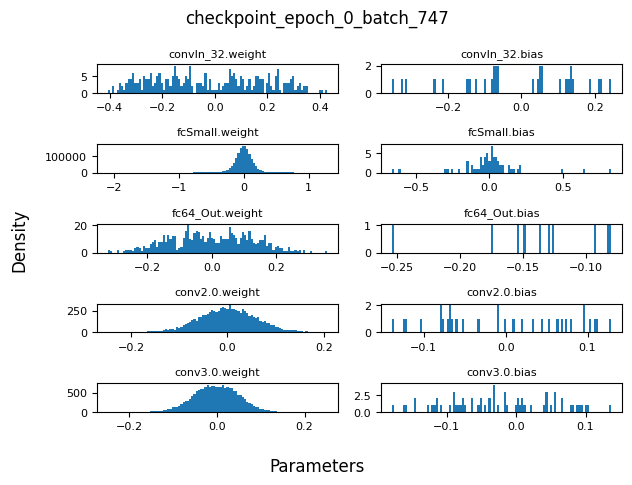

<Figure size 640x480 with 0 Axes>

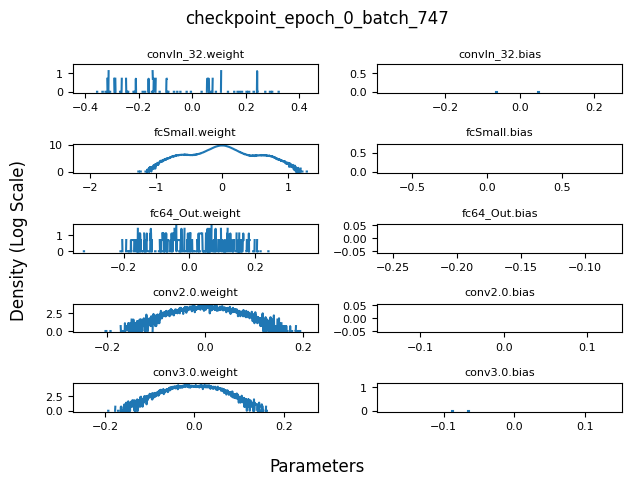

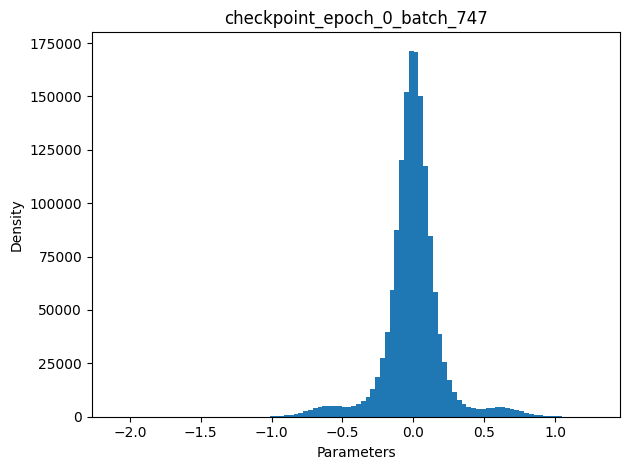

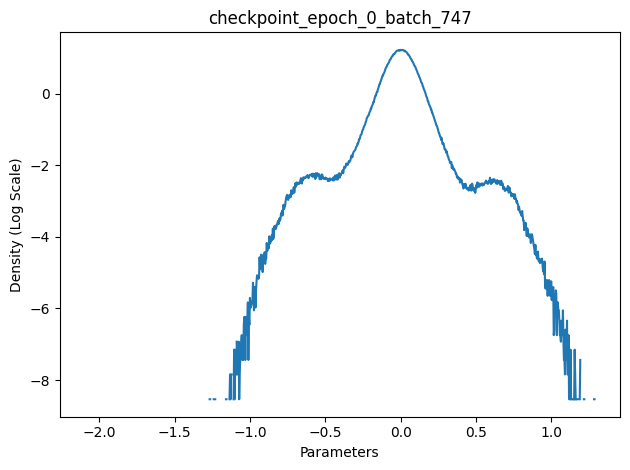

<Figure size 640x480 with 0 Axes>

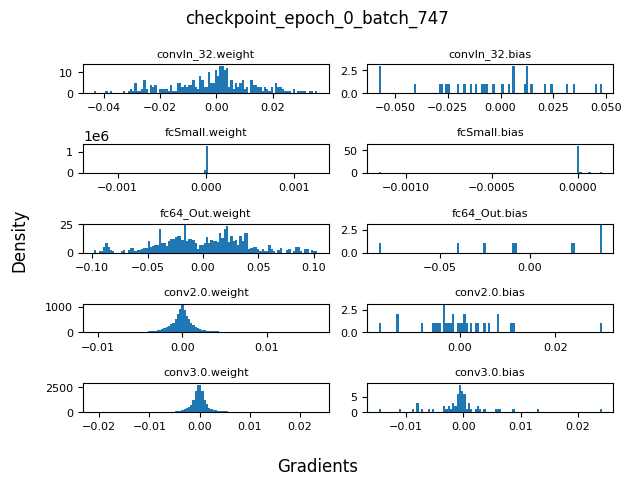

<Figure size 640x480 with 0 Axes>

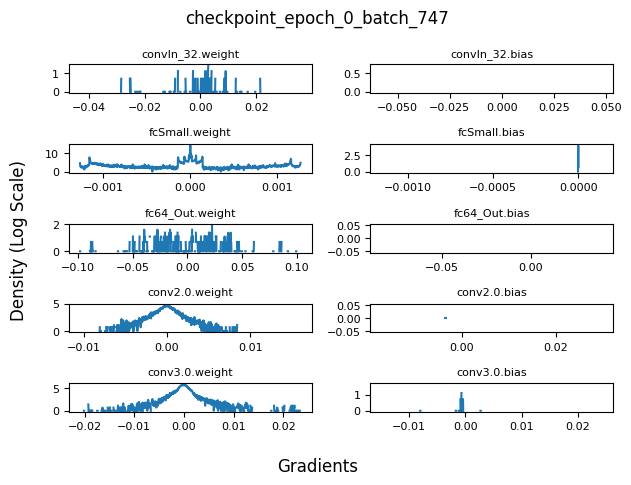

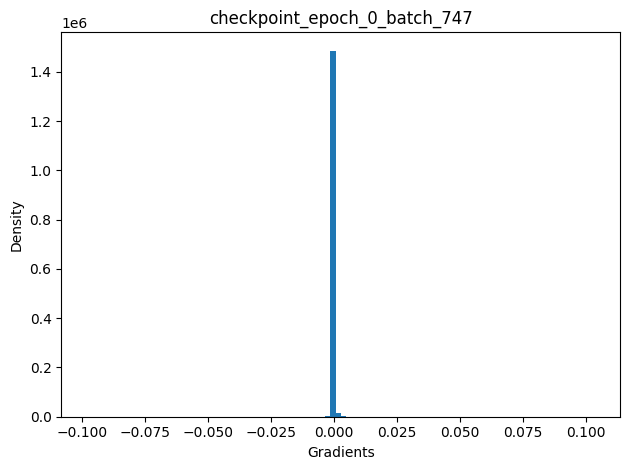

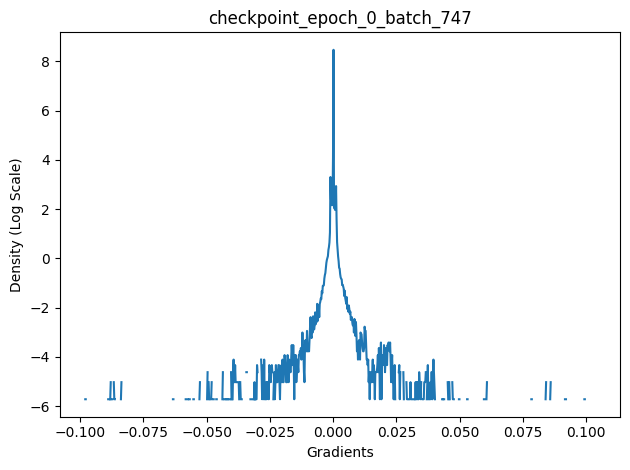

<Figure size 640x480 with 0 Axes>

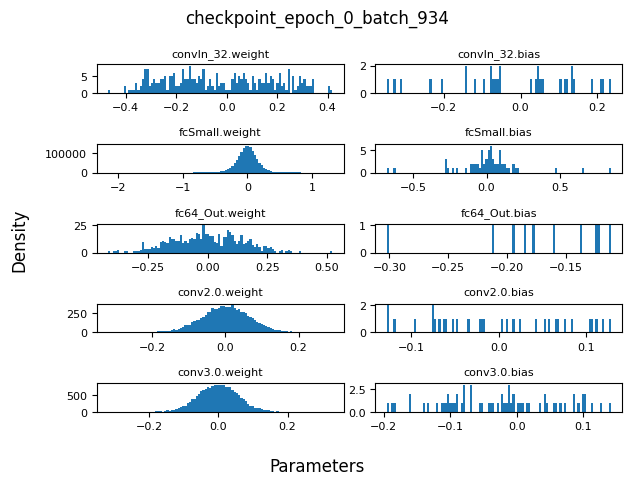

<Figure size 640x480 with 0 Axes>

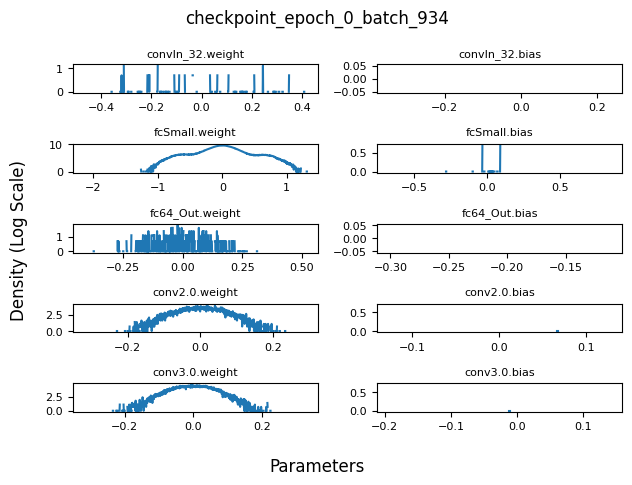

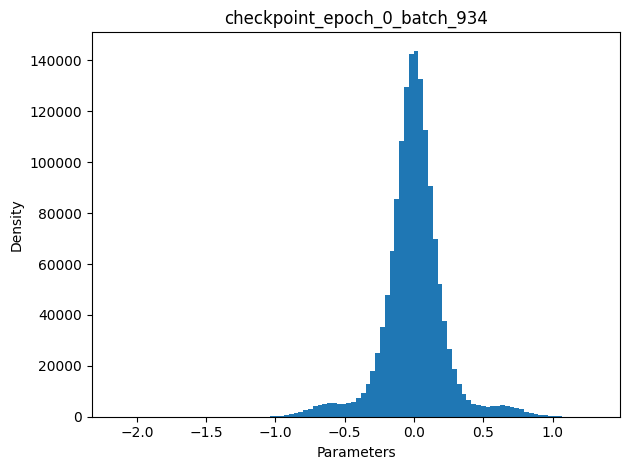

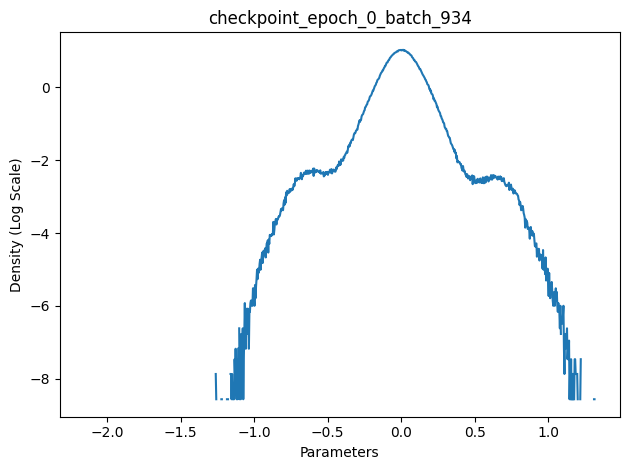

<Figure size 640x480 with 0 Axes>

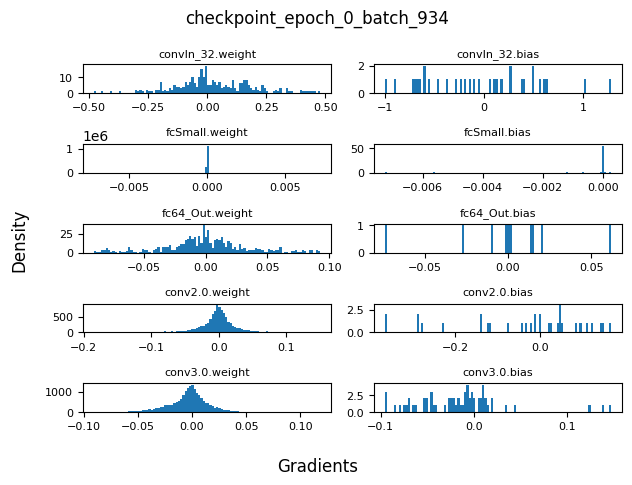

<Figure size 640x480 with 0 Axes>

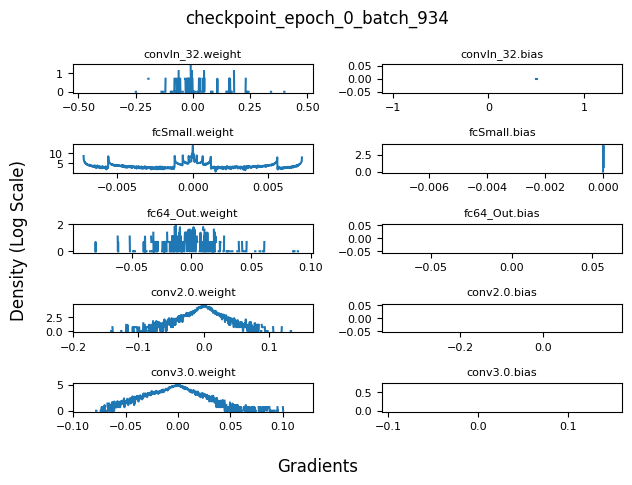

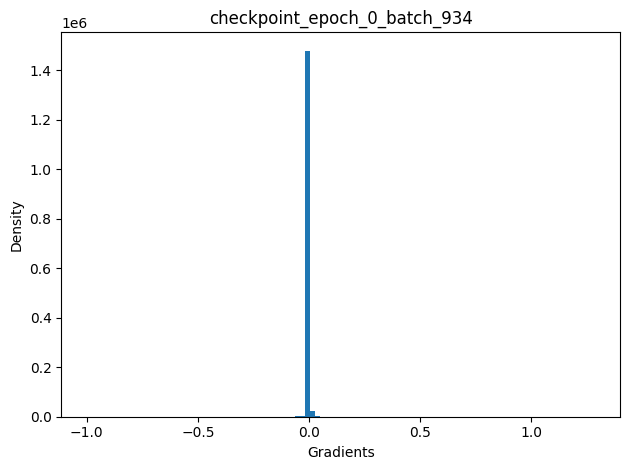

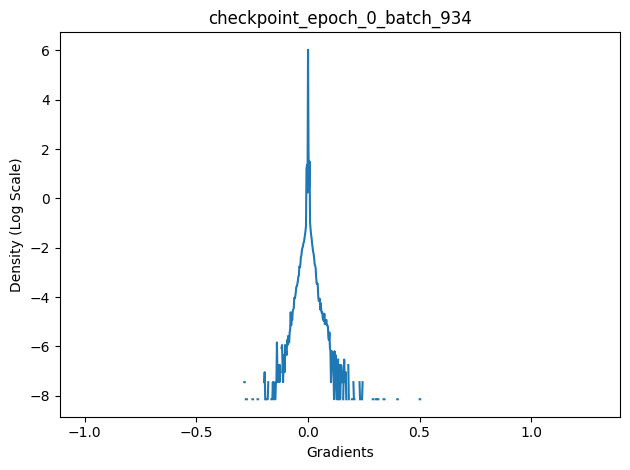

<Figure size 640x480 with 0 Axes>

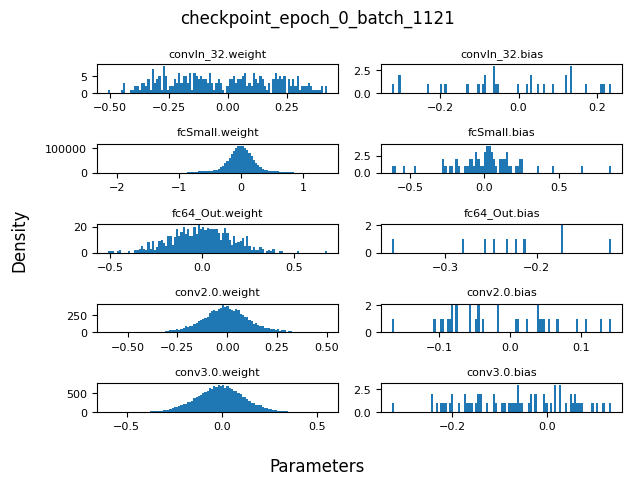

<Figure size 640x480 with 0 Axes>

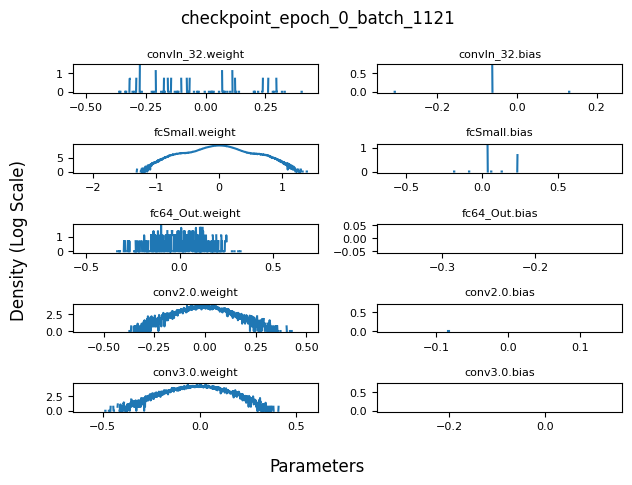

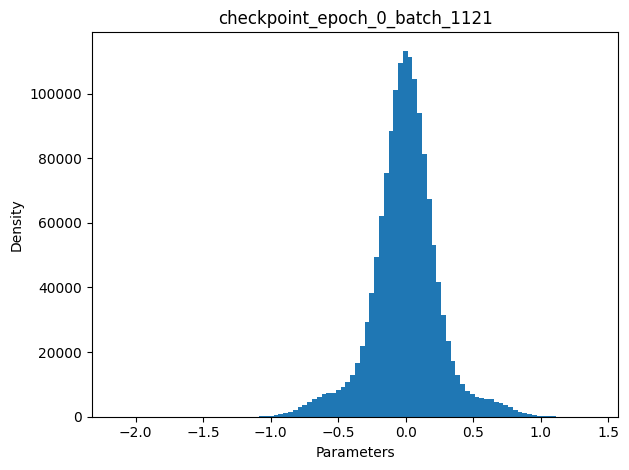

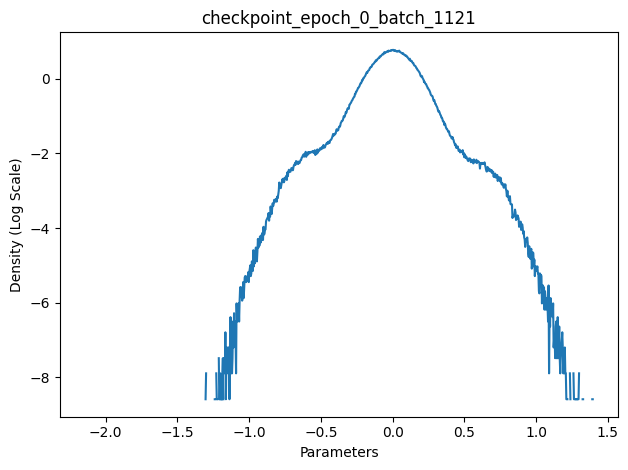

<Figure size 640x480 with 0 Axes>

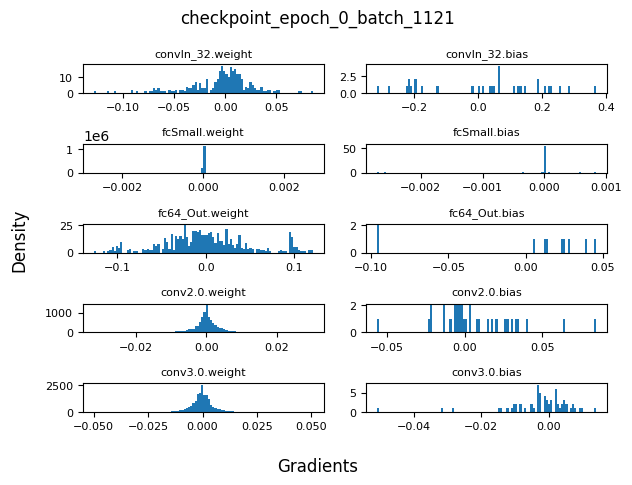

<Figure size 640x480 with 0 Axes>

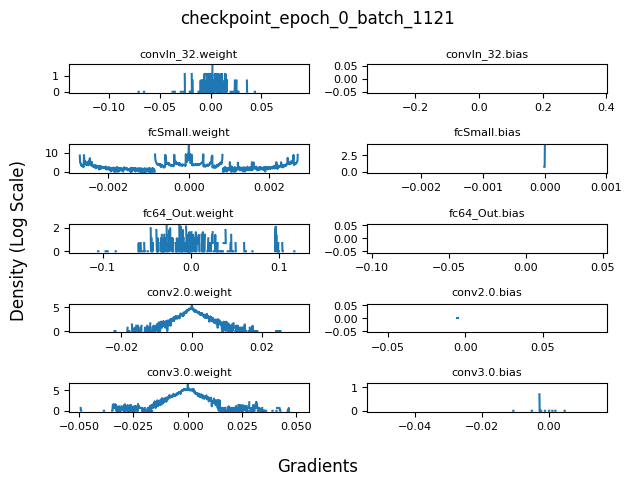

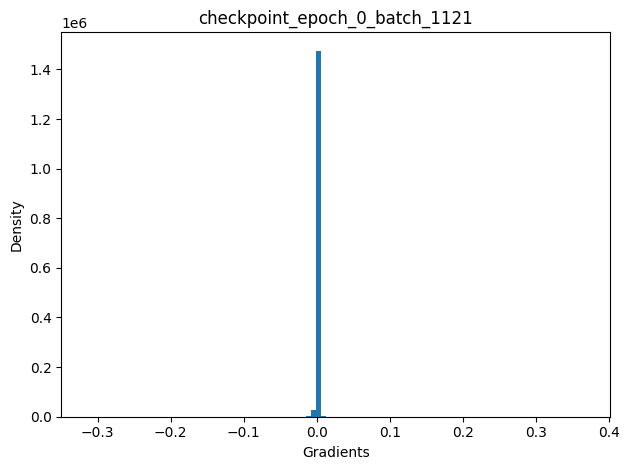

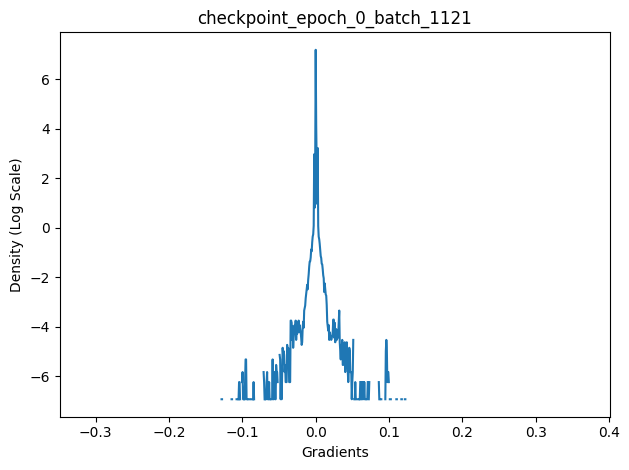

<Figure size 640x480 with 0 Axes>

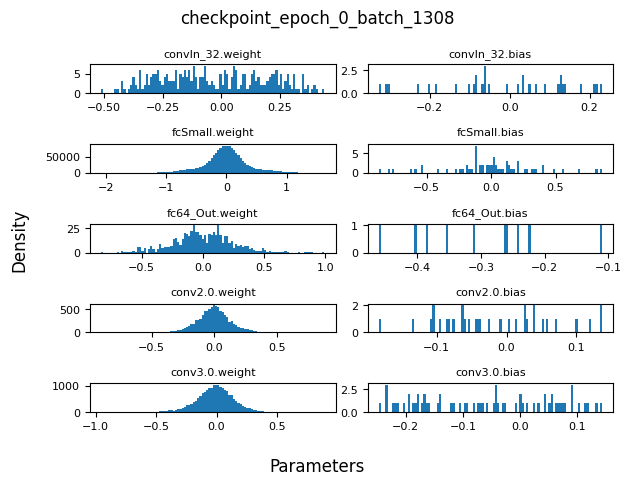

<Figure size 640x480 with 0 Axes>

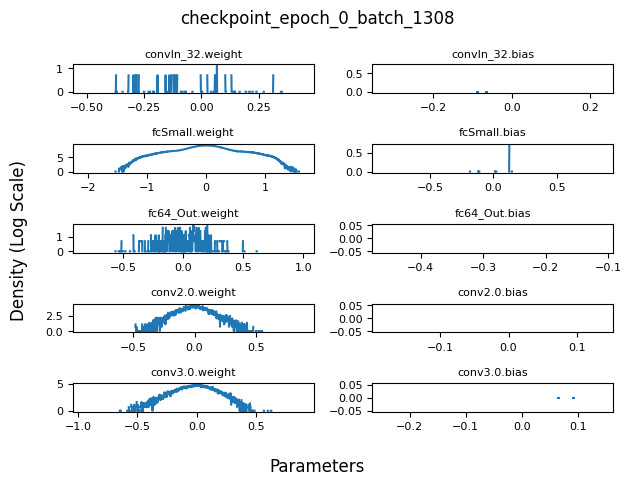

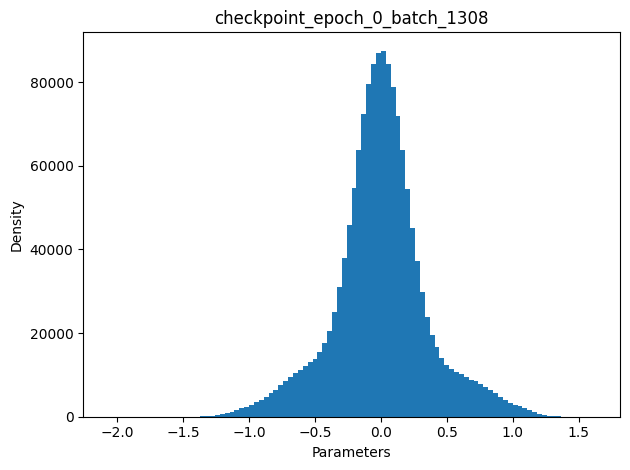

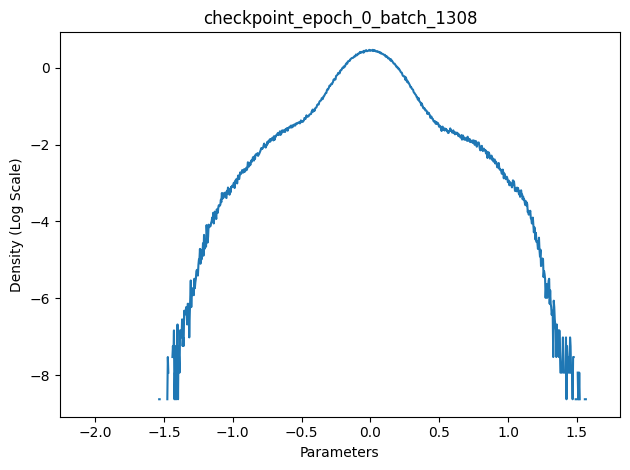

<Figure size 640x480 with 0 Axes>

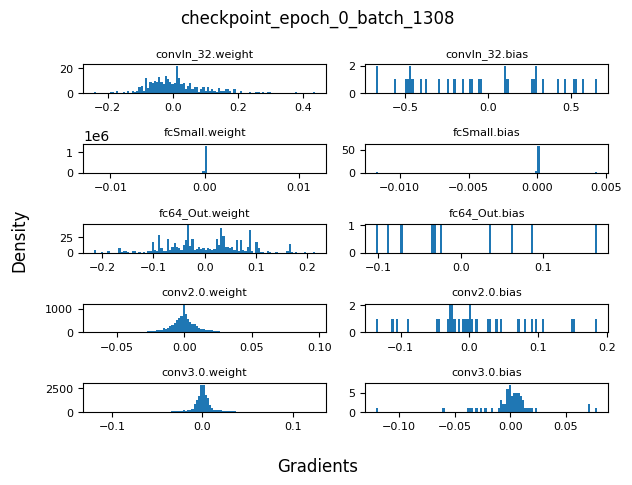

<Figure size 640x480 with 0 Axes>

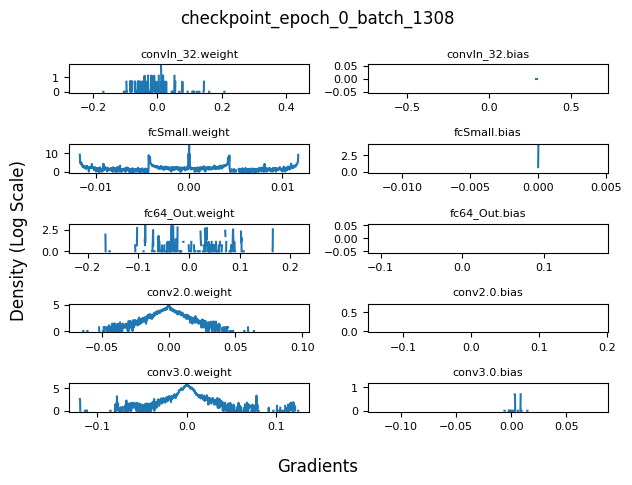

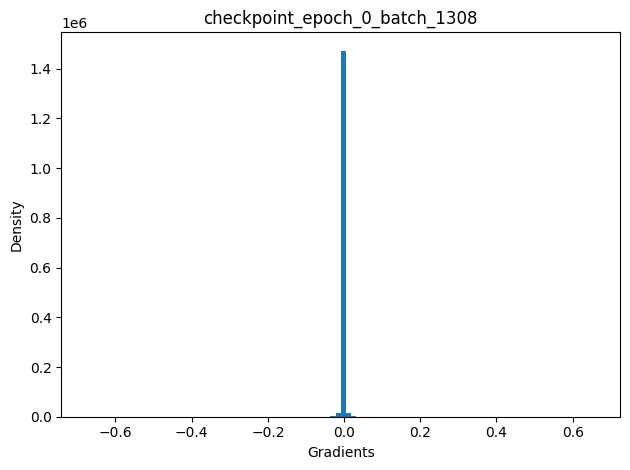

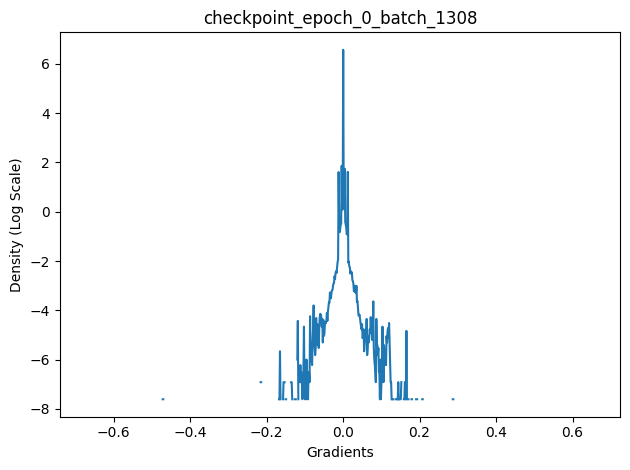

d:\Documents\Programming\Bsc Thesis\Second-order-optimization\.venv\Lib\site-packages\matplotlib\axes\_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
d:\Documents\Programming\Bsc Thesis\Second-order-optimization\.venv\Lib\site-packages\matplotlib\axes\_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

<Figure size 640x480 with 0 Axes>

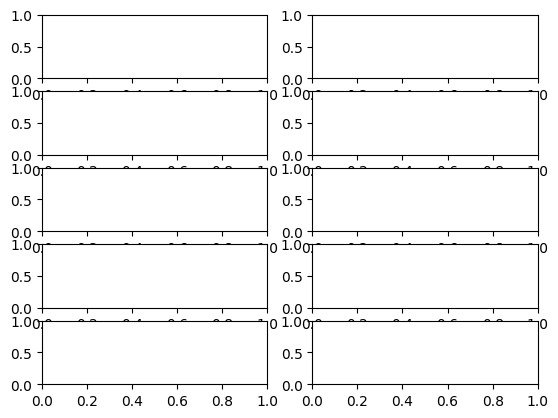

In [79]:
%matplotlib inline
for f in file_names:
    checkpoint_specs = CheckpointSpecs(f)

    checkpoint_specs.params_hist()
    checkpoint_specs.params_log_density()
    checkpoint_specs.full_params_hist()
    checkpoint_specs.full_params_log_density()

    checkpoint_specs.grads_hist()
    checkpoint_specs.grads_log_density()
    checkpoint_specs.full_grads_hist()
    checkpoint_specs.full_grads_log_density()